<a href="https://colab.research.google.com/github/varmaakash/Potholes-Detection/blob/main/road_defect_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving roaddis.csv to roaddis.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_csv('roaddis.csv')

In [ ]:
df.head()

,Section (100m),International Roughness Index (IRI) (m/km),Rut Depth (mm),Crack Density (%),Skid Resistance (SN),Pavement Deflection (µm),Surface Texture Depth (STD) (mm),Pothole Count,Pothole Size (m²),Road Profile Variance (µm),Edge Breaks (count),Edge Drop-offs (length in m)
0,100,5.93,17.58,5.39,47.27,254.86,1.13,0,1.99,110.10,2,8.20
1,200,5.12,9.21,2.50,50.39,278.02,0.73,2,1.68,131.45,1,7.31
2,300,3.15,16.78,7.49,63.49,234.70,1.96,2,1.52,52.53,0,9.60
3,400,2.35,19.43,5.78,62.97,239.31,0.79,2,1.22,123.91,2,3.94
4,500,4.60,13.95,2.14,49.62,162.22,2.46,2,1.49,101.55,1,3.69


In [ ]:
# Define thresholds for labeling (these are arbitrary and should be adjusted as needed)
iri_threshold = 3.0
rut_depth_threshold = 20.0
crack_density_threshold = 5.0
pothole_count_threshold = 2
# Create a binary label 'Road Condition' based on thresholds
df['Road Condition'] = np.where(
    (df['International Roughness Index (IRI) (m/km)'] > iri_threshold) |
    (df['Rut Depth (mm)'] > rut_depth_threshold) |
    (df['Crack Density (%)'] > crack_density_threshold) |
    (df['Pothole Count'] > pothole_count_threshold),
    'Bad', 'Good'
)

# Convert 'Road Condition' to numeric
df['Road Condition'] = df['Road Condition'].map({'Good': 0, 'Bad': 1})

In [ ]:
# Define feature columns and target column
feature_cols = df.columns[1:-1]  # All columns except 'Section (100m)' and 'Road Condition'
X = df[feature_cols]
y = df['Road Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
# Example of making a prediction for a new section
new_section = pd.DataFrame({
    'International Roughness Index (IRI) (m/km)': [3.5],
    'Rut Depth (mm)': [10],
    'Crack Density (%)': [4],
    'Skid Resistance (SN)': [50],
    'Pavement Deflection (µm)': [200],
    'Surface Texture Depth (STD) (mm)': [1.5],
    'Pothole Count': [1],
    'Pothole Size (m²)': [1],
    'Road Profile Variance (µm)': [80],
    'Edge Breaks (count)': [1],
    'Edge Drop-offs (length in m)': [5]
})

# Standardize the new section
new_section = scaler.transform(new_section)

# Predict the road condition
prediction = model.predict(new_section)
print('Predicted Road Condition:', 'Good' if prediction[0] == 0 else 'Bad')


Predicted Road Condition: Bad


In [ ]:
# Count the number of 'Good' and 'Bad' sections
good_bad_counts = df['Road Condition'].value_counts()

# Map the numeric labels back to 'Good' and 'Bad' for clarity
good_bad_counts.index = good_bad_counts.index.map({0: 'Good', 1: 'Bad'})

# Display the counts
print(good_bad_counts)


Road Condition
Bad     45
Good     5
Name: count, dtype: int64


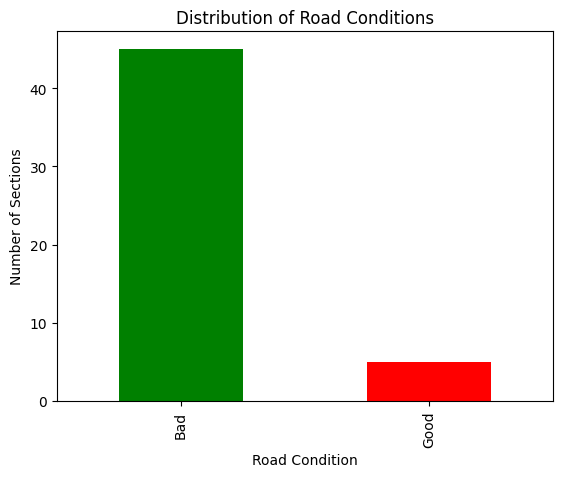

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of the number of 'Good' and 'Bad' sections
good_bad_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Sections')
plt.show()
